In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
!pip install dabl

     |████████████████████████████████| 558 kB 282 kB/s 
     |████████████████████████████████| 22.3 MB 21.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.2 which is incompatible.


In [3]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

In [4]:
# importing the dataset
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
#checking the shape of the data
df.shape

(200, 5)

In [5]:
#checking first five rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop('CustomerID', axis=1)
# describing the data
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
# let's change the name of the columns to make it easier for analysis
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}, inplace=True)

In [8]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
#checking for null values
df.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

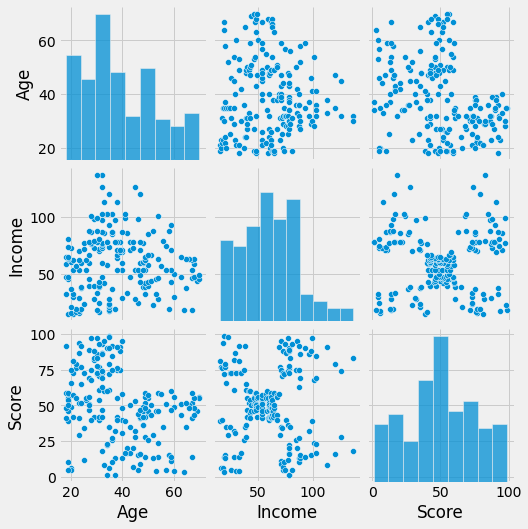

In [10]:
# lets get the pairplot for our data
sns.pairplot(df)
plt.show()

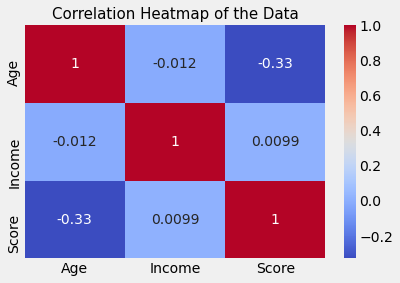

In [11]:
# lets check the Correlation Heat Map of the Data

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Score'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Income'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=8.49E-02'}, xlabel='Score', ylabel='Gender'>]],
       dtype=object)]

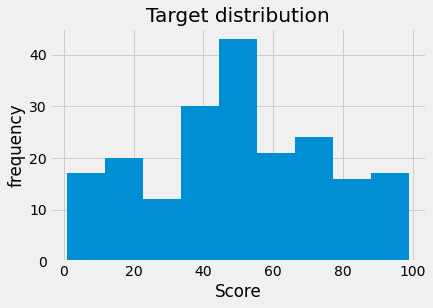

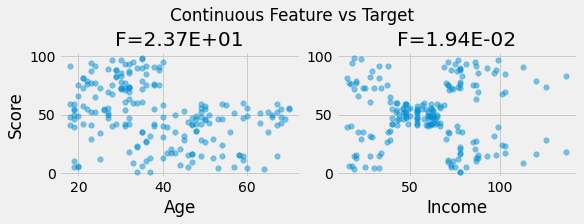

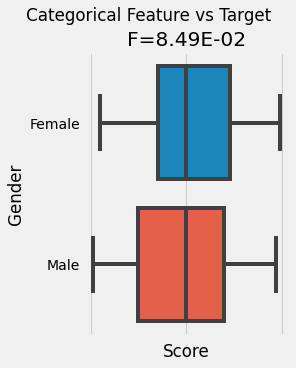

In [12]:
# lets analyze the data with respect to Spending Score
import warnings
warnings.filterwarnings('ignore')

dabl.plot(df, target_col = 'Score')

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Age', ylabel='Income'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=8.95E-03'}, xlabel='Income', ylabel='Gender'>]],
       dtype=object)]

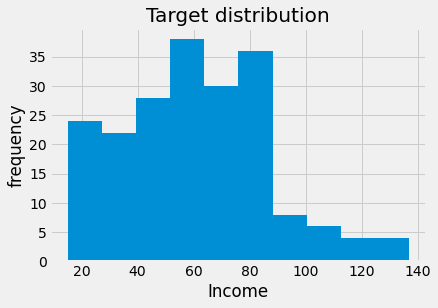

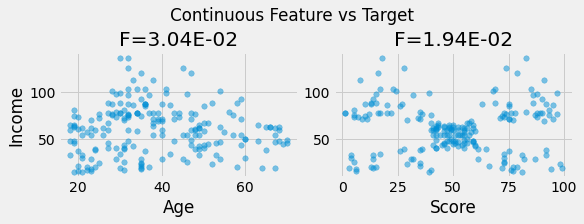

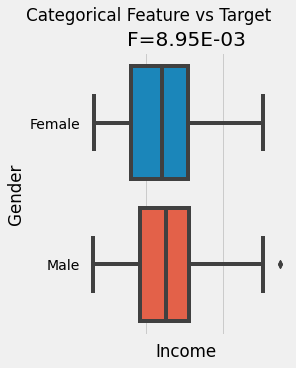

In [13]:
# lets analyze the data with respect to Annual Income
dabl.plot(df, target_col = 'Income')

## Data Vizualization

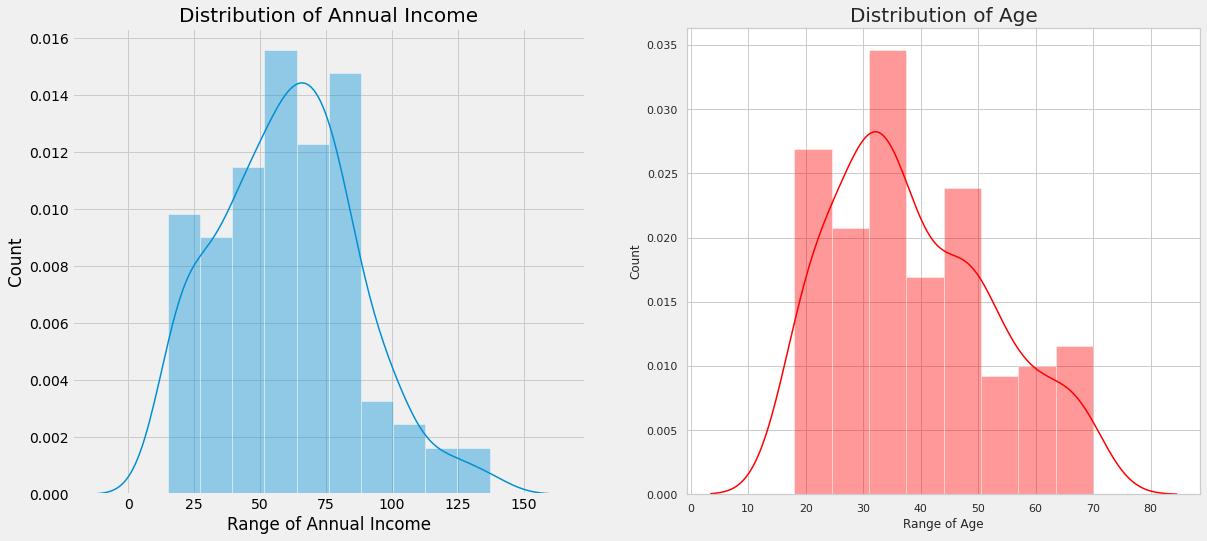

In [14]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

**Observation**
1. There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.


2. The most regular customers for the  has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent. Youngsters are lesser in number as compared to the Middle aged people.

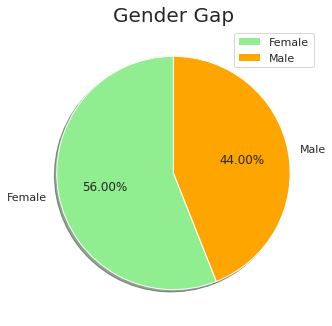

In [15]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

**Observation**
1. The female customers are in the lead with a share of 56% whereas the males have a share of 44%, that's a huge gap specially when the population of males is comparatively higher than females.

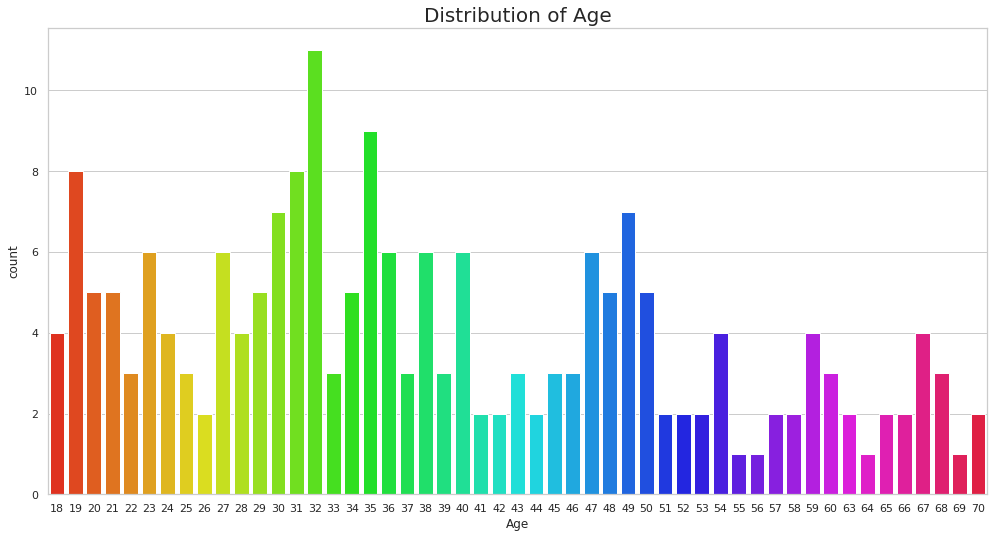

In [16]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

**Observation**
1.  It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of customers for the Age 18 and 67. People of Age 55, 56, 69, 64 are very less frequent. most number of customers are from age 32.

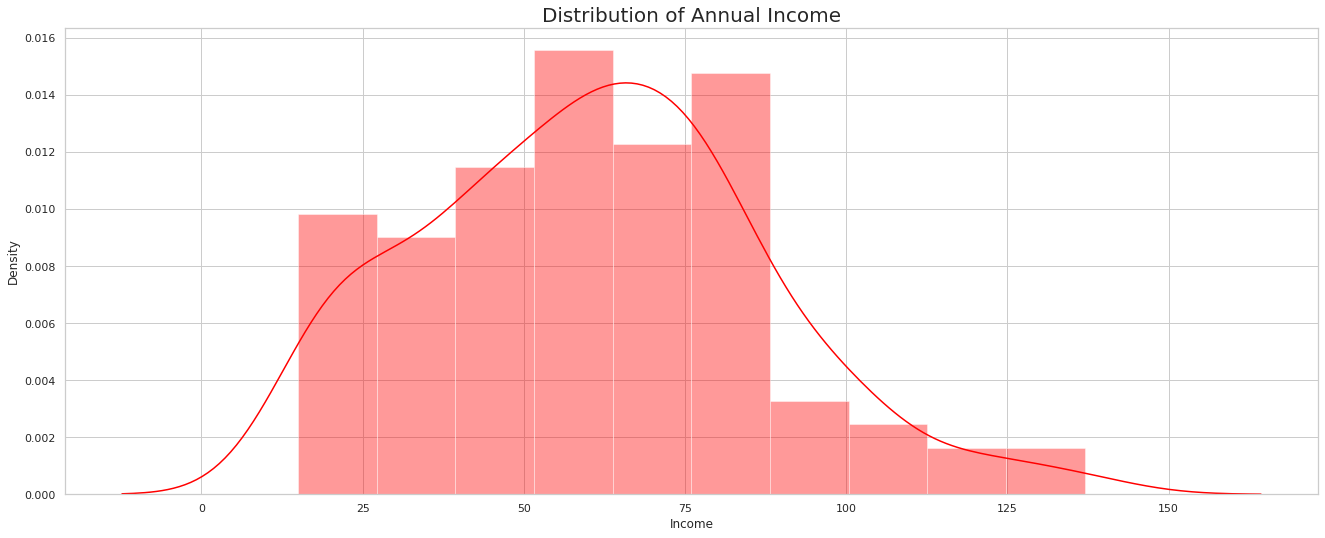

In [17]:
# lets check the ditribution of Annual Income

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(df['Income'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

**Observation**
1. there are customers in the mall with a very much comparable frequency with their Annual Income ranging from 15k US dollar  to  137k US dollar . There are more Customers  who have their Annual Income as 54k US dollar or 78k US dollar .

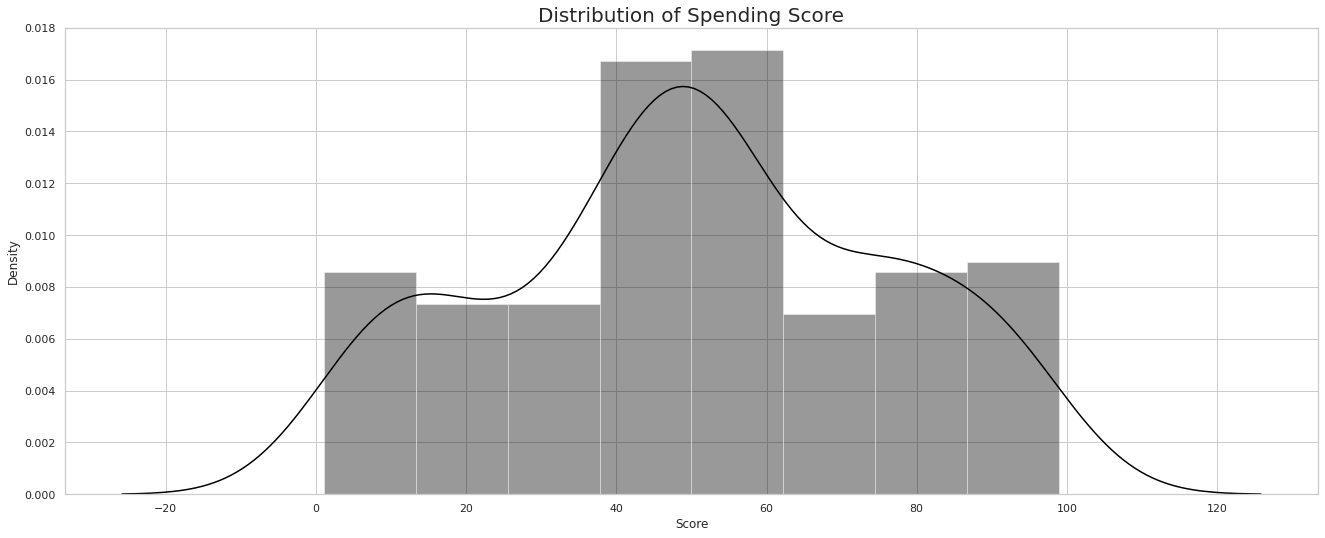

In [18]:
# lets check the distribution of Spending Score

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(df['Score'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

**Observation**
1. most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also.

## Clustering Analysis

In [19]:
# Lets select the Spending score, and Annual Income Columns from the Data
x = df.loc[:, ['Score', 'Income']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [20]:
x_df  = pd.DataFrame(x)
x_df.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


## KMeans Clustering

**Clustering between Anual Income and Spending Score**

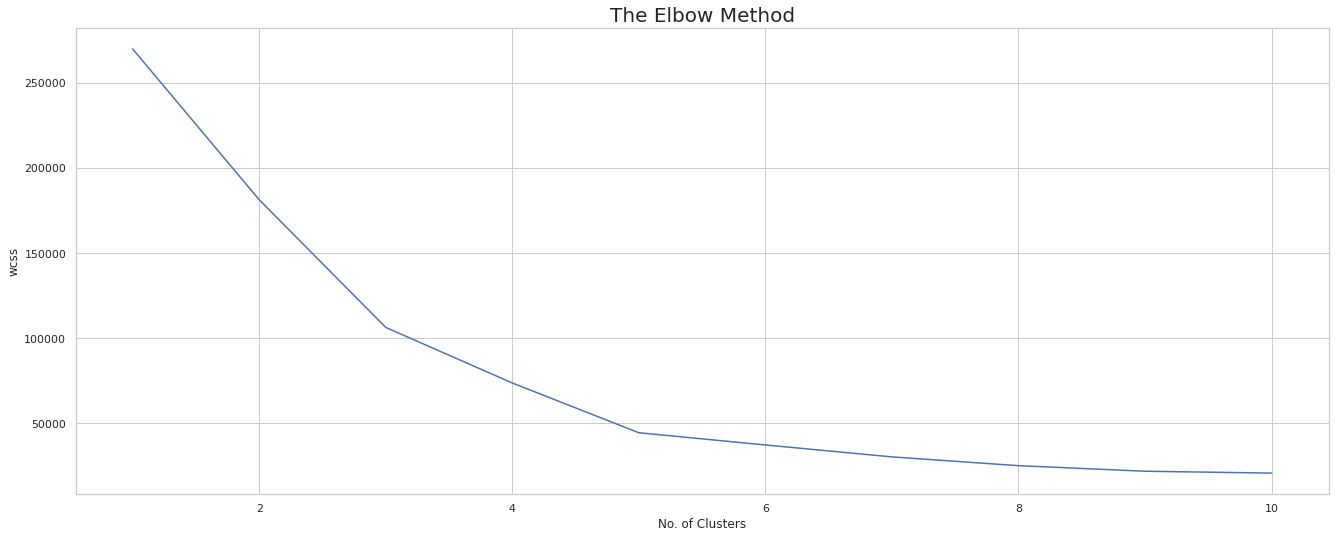

In [21]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Observation**
1. we get two elbows at 3 and 5. As per elbow method definition we take the last one so our no. of cluster will be 5.

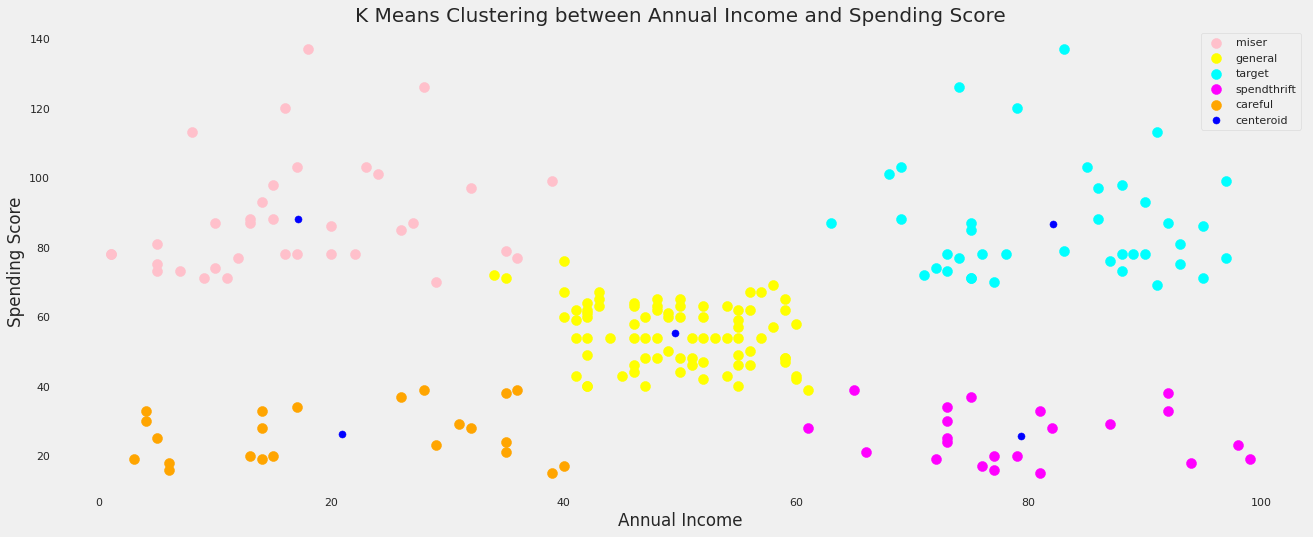

In [22]:
# lets visualize these clusters
plt.style.use('fivethirtyeight')
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')


plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Observation**
1. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer.

**Clustering between Age and Spending Score**

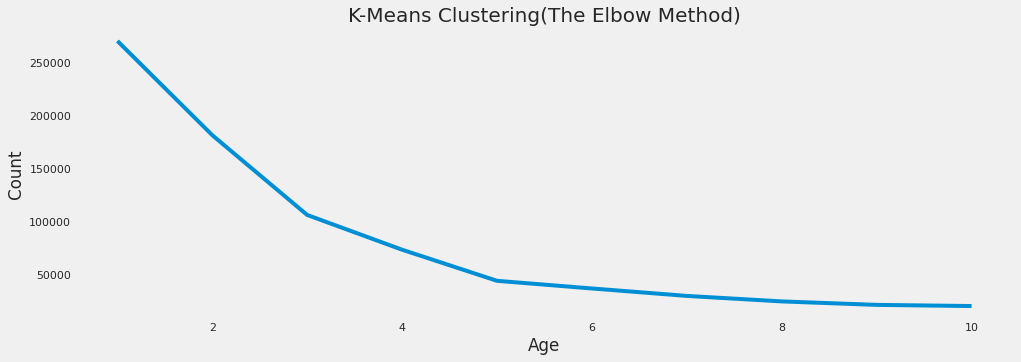

In [23]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

Number of cluster is 5

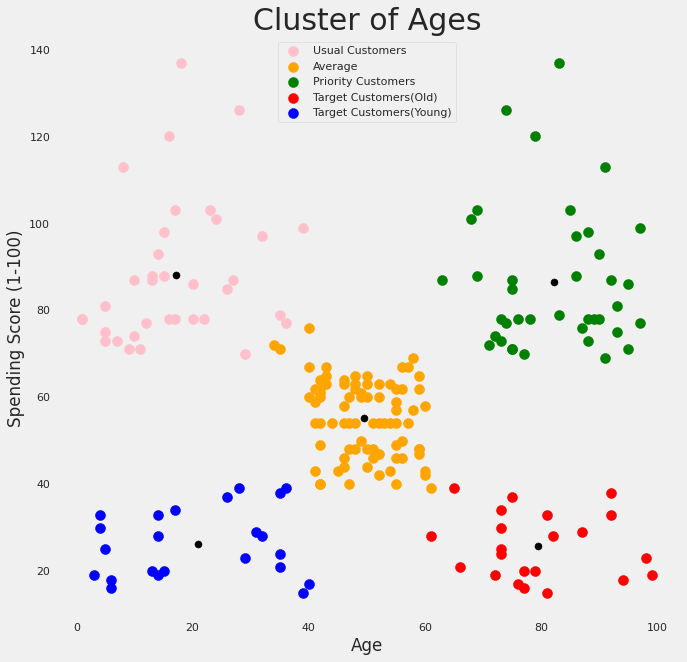

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Average')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'green', label = 'Priority Customers')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'blue', label = 'Target Customers(Young)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()